In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns",100)

In [5]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\melb_data.csv")

In [92]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# Distribution of houses

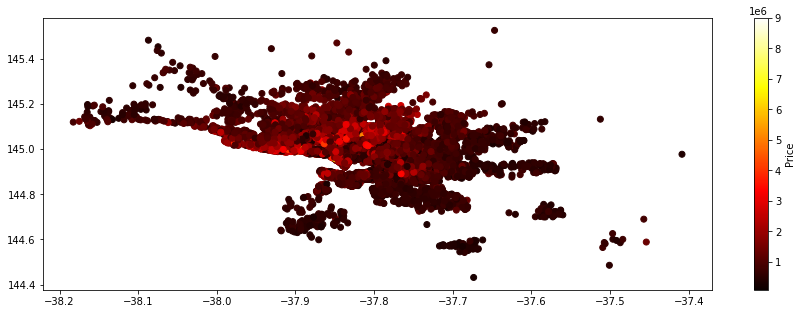

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(df.Lattitude,df.Longtitude,c=df.Price,cmap="hot")
plt.colorbar().set_label("Price")
plt.show()

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


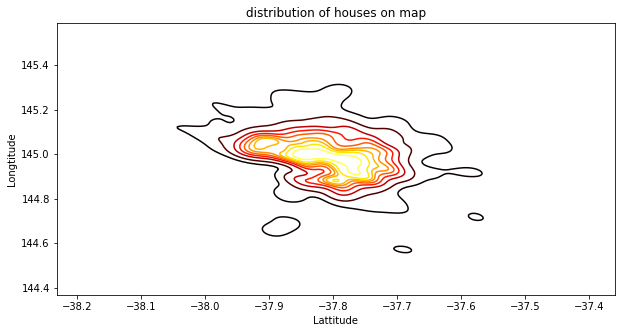

In [79]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.Lattitude,df.Longtitude,c=df.Price,cmap="hot")
plt.title("distribution of houses on map")
plt.show()

# Find most expensive suburbs and their distribution on map 

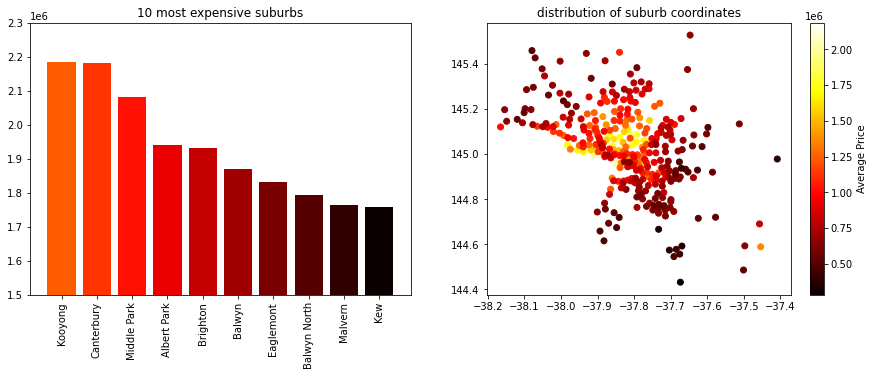

In [94]:
grouped=df.groupby("Suburb").agg({"Price":"mean","Lattitude":"mean","Longtitude":"mean"}).reset_index().sort_values("Price",ascending=False)
fig,axes=plt.subplots(1,2,figsize=(15,5))
colors=reversed(list(plt.get_cmap("hot")(np.linspace(0,0.5,10))))

plt.subplot(1,2,1)
plt.bar(grouped.Suburb.head(10),grouped.Price.head(10),color=[c for c in colors])
plt.title("10 most expensive suburbs")
plt.xticks(rotation=90)
plt.ylim(1500000,2300000)


plt.subplot(1,2,2)
plt.scatter(grouped.Lattitude,grouped.Longtitude,c=grouped.Price,cmap="hot")
plt.colorbar().set_label("Average Price")
plt.title("distribution of suburb coordinates")
plt.show()

# Distribution of prices  

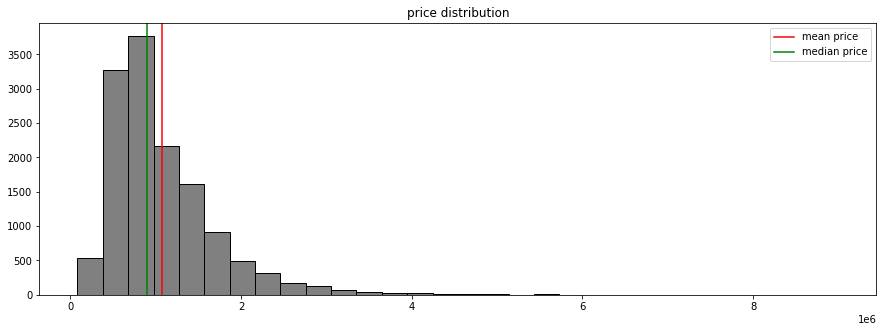

In [90]:
plt.figure(figsize=(15,5))
plt.hist(df.Price,ec="k",bins=30,color="grey")
plt.axvline(df.Price.mean(),label="mean price",color="r")
plt.axvline(df.Price.median(),label="median price",color="g")
plt.xticks()
plt.title("price distribution")
plt.legend()
plt.show()